* Exploratory Data Analysis(EDA)
* Dataset:IRIS DATASET
* Objective:Classify a new flower to one of the specified label.

# Data-Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("iris.csv")              # iris.csv -> Pandas dataframe.
print(data.shape)                         # dimensions of data



(150, 5)


In [4]:
print(data.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [5]:
data["species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

# 2-D Scatter Plot

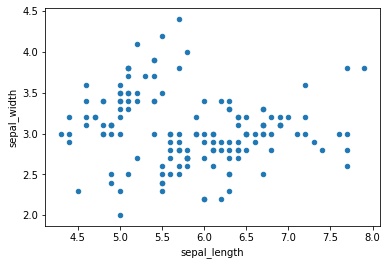

In [6]:
data.plot(kind='scatter',x='sepal_length',y='sepal_width',style='whitegrid')
plt.show()

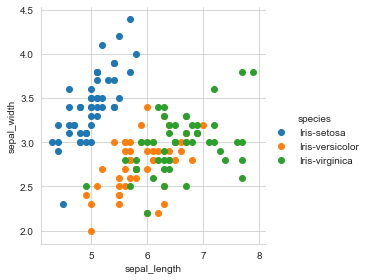

In [7]:
# 2-D scatter plot with color coding.

sns.set_style('whitegrid')
sns.FacetGrid(data,hue='species',height=4) \
   .map(plt.scatter,"sepal_length","sepal_width") \
   .add_legend()
plt.show()

# 3D-Scatter Plot

https://plot.ly/pandas/3d-scatter-plots/

# Pair-plot

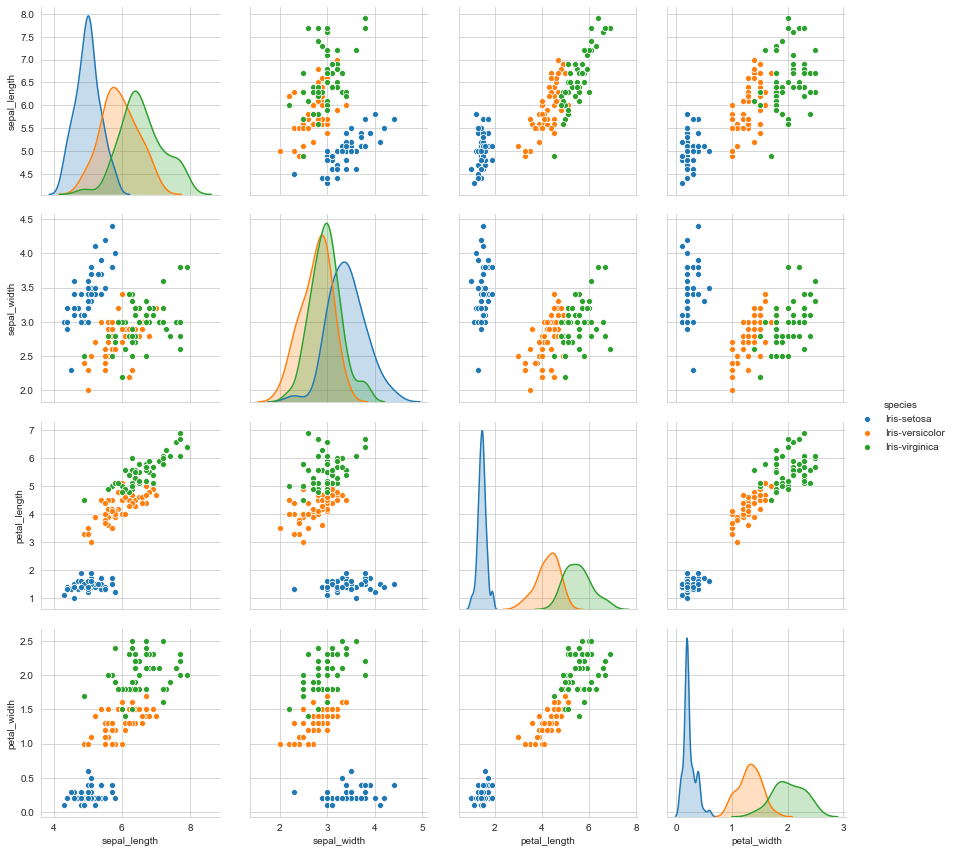

In [9]:
# Pairwise scatter plot: Pair plot
# If no of features are high
# Only possible to view 2D patterns
# Will take all the columns

plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,hue="species",height=3)             # 
plt.show()

Observations from Pair Plot:

* petal_length and petal_width are deciding factor.
* Simple "if ... else" conditions can also be used to build a simple model to classify flowers.

  Example: setosa are easily classifiable on the basis of plot no 12.

# Histogram, PDF, CDF

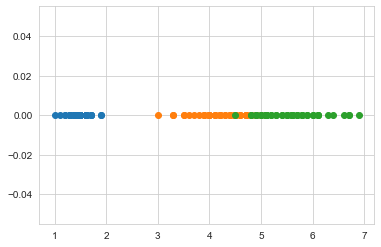

In [10]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length

import numpy as np
#print(data.head(5))
iris_setosa = data.loc[data["species"] == "Iris-setosa"]            # Storing all rows corresponding to setosa if match found
iris_virginica = data.loc[data["species"] == "Iris-virginica"]
iris_versicolor = data.loc[data["species"] == "Iris-versicolor"]
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')          # plot(x,y,linestyle or marker)
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

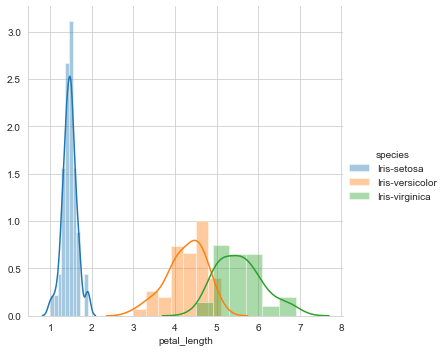

In [11]:
sns.FacetGrid(data, hue="species", height=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

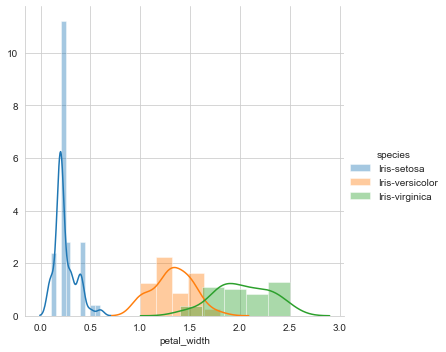

In [13]:
sns.FacetGrid(data, hue="species", height=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

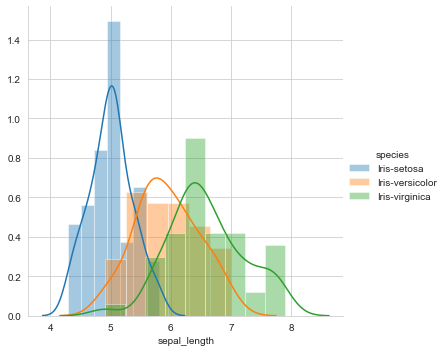

In [14]:
sns.FacetGrid(data, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

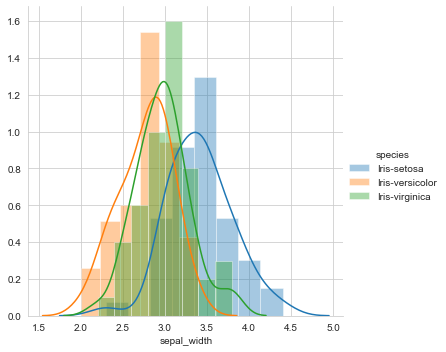

In [15]:
sns.FacetGrid(data, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


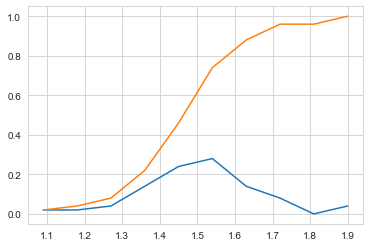

In [16]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a petal_length of less than 5?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


# As we can see in graph approx. 82% of setosa data have petal length<=1.6

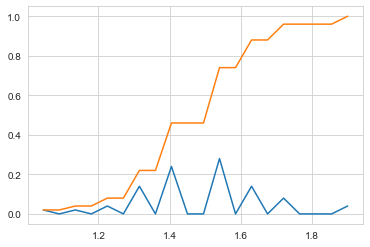

In [17]:

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();


In [18]:
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


In [19]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


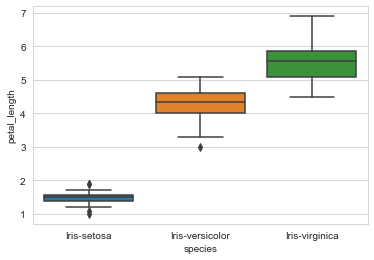

In [22]:
# Another method of visualizing the  1-D scatter plot
sns.boxplot(x='species',y='petal_length', data=data)
plt.show()

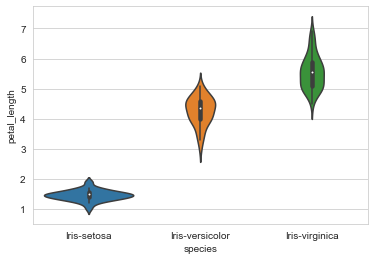

In [24]:
sns.violinplot(x="species", y="petal_length", data=data, size=8)
plt.show()

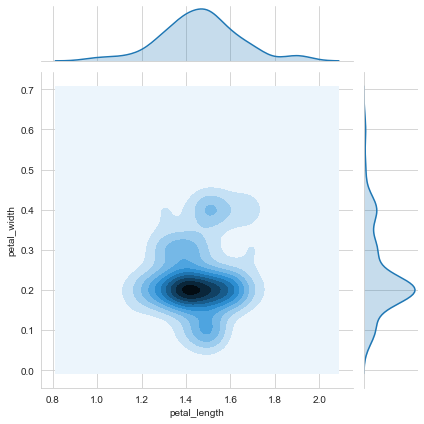

In [25]:
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();